In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from old_helper import OldHelper

In [2]:
xwd = 0.
ywd = 0.
zwd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10}
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [3]:
old_helper = OldHelper()
helper = Helper()

In [4]:
s = 7
old_green = old_helper.get_green_matrix(well, s)
new_green, dummy = helper.get_green_matrix(well, s)

2.6457513110645907
3 0.0 0.09999999999999998
2 0.19999999999999996 0.09999999999999998
2 0.29999999999999993 0.19999999999999996
2 0.3999999999999999 0.29999999999999993
2 0.5 0.3999999999999999
2 0.6 0.5
2 0.7 0.6
2 0.8 0.7
2 0.9 0.8
2 1.0 0.9
2 1.1 1.0
2 1.2 1.1
2 1.3 1.2
2 1.4 1.3
2 1.5 1.4
2 1.6 1.5
2 1.7000000000000002 1.6
2 1.8 1.7000000000000002
2 1.9 1.8
2 2.0 1.9
1 0.09999999999999998 0.0
3 0.0 0.09999999999999998
2 0.19999999999999996 0.09999999999999998
2 0.29999999999999993 0.19999999999999996
2 0.4 0.29999999999999993
2 0.5 0.4
2 0.6 0.5
2 0.7 0.6
2 0.8 0.7
2 0.9 0.8
2 1.0 0.9
2 1.1 1.0
2 1.2000000000000002 1.1
2 1.3 1.2000000000000002
2 1.4 1.3
2 1.5 1.4
2 1.6 1.5
2 1.7000000000000002 1.6
2 1.8 1.7000000000000002
2 1.9 1.8
1 0.19999999999999996 0.09999999999999998
1 0.09999999999999998 0.0
3 0.0 0.09999999999999998
2 0.19999999999999996 0.09999999999999998
2 0.30000000000000004 0.19999999999999996
2 0.4 0.30000000000000004
2 0.5 0.4
2 0.6000000000000001 0.5
2 0.7000000000

In [5]:
i_old = range(10, 20)
i_new = range(20)
v_old = old_green[-2,1:]
v_new = new_green[0, 1:]

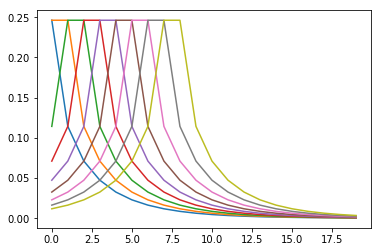

In [6]:
for i in range(9):
    plt.plot(i_new, new_green[i,1:])

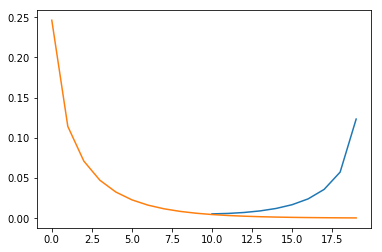

In [7]:
plt.plot(i_old, v_old)
plt.plot(i_new, v_new)

In [8]:
v2_new = np.zeros(10)
for i in range(10):
    v2_new[i] = v_new[i]+v_new[i-1]
v2_new *= 0.5
v2_new = np.flip(v2_new, axis=0)

In [9]:
from source_helper import *

In [10]:
xd = 0.1
yd = 0.
xwd = 0.
su = s**0.5
c = 1
N = 10
dx = 1/N
v1 = np.zeros(2*N)
for i in range(2*N):
    l1 = -1+(i)*dx
    l2 = -1+(i+1)*dx
    v1[i] = frac_inf_imp_imp(xd, yd, xwd, ywd, su, c, l1, l2)

1 1.1 1.0
1 1.0 0.9
1 0.9 0.7999999999999999
1 0.7999999999999999 0.7
1 0.7 0.6
1 0.6 0.4999999999999999
1 0.4999999999999999 0.3999999999999999
1 0.3999999999999999 0.29999999999999993
1 0.29999999999999993 0.19999999999999998
1 0.19999999999999998 0.1
3 0.1 8.326672684688674e-17
2 0.10000000000000017 8.326672684688674e-17
2 0.20000000000000004 0.10000000000000017
2 0.30000000000000016 0.20000000000000004
2 0.4 0.30000000000000016
2 0.5000000000000001 0.4
2 0.6000000000000002 0.5000000000000001
2 0.7000000000000001 0.6000000000000002
2 0.8000000000000002 0.7000000000000001
2 0.9 0.8000000000000002


In [11]:
v1

array([ 0.00451441,  0.00616247,  0.00845333,  0.01166604,  0.01622379,
        0.0227912 ,  0.03246589,  0.04720605,  0.0709845 ,  0.11415527,
        0.246182  ,  0.246182  ,  0.11415527,  0.0709845 ,  0.04720605,
        0.03246589,  0.0227912 ,  0.01622379,  0.01166604,  0.00845333])

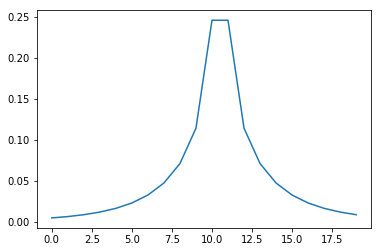

In [14]:
plt.plot(v1)

In [12]:
v2 = calc_bessel_integrals(s, 1, 1, N)

2.6457513110645907


In [13]:
v2

array([ 0.        ,  0.246182  ,  0.11415527,  0.0709845 ,  0.04720605,
        0.03246589,  0.0227912 ,  0.01622379,  0.01166604,  0.00845333,
        0.00616247,  0.00451441,  0.00332044,  0.00245053,  0.00181373,
        0.00134575,  0.00100069,  0.00074551,  0.00055635,  0.00041581,
        0.00031119])